In [1]:
import wandb
import os
import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.font_manager as fm
import scipy
import tree
import json
import glob
fm.fontManager.addfont('../times.ttf')
fm.fontManager.addfont('../times_Italic.ttf')

jobs = {
    "offline": [
        "gptoracle_dpo_offline_0924T08:25",
        "gptoracle_dpo_offline_0914T12:35",
        "gptoracle_dpo_offline_0914T08:43"
    ],
    "online": [
        "gptoracle_dpo_online_0915T04:25",
        "gptoracle_dpo_online_0914T08:45",
        "gptoracle_dpo_online_0913T02:53",
    ],
    "xpo": [
        "gptoracle_test_xpo_0915T04:26",
        "gptoracle_test_xpo_0914T08:47",
        "gptoracle_test_xpo_0913T05:22",
    ],
    "apl":[
        "gptoracle_apl_fix_0924T12:29",
        "gptoracle_apl_fix_0924T10:08",
        "gptoracle_apl_fix_0924T08:54"
    ],
    "sea":[
        "skyworkrm_dpo_sea_0926T17:10",
        "skyworkrm_dpo_sea_0926T11:26",
        "skyworkrm_dpo_sea_0926T05:26"
    ]
}

api = wandb.Api()
save_dir = "./gpt_oracle_data"
runs = api.runs("lkevinzc/ellm_simpo")
data_list = []
cfg_list = []

features_of_interest = ["eval/rm_win_rate_prob", "misc/query_step"]
flatten_fns = tree.flatten(jobs)
os.makedirs(save_dir, exist_ok=True)
for run in tqdm.tqdm(runs):
    cfg = run.config
    if run.name in flatten_fns:
        print(run.name)
        name = run.name
        if not os.path.exists(f"{save_dir}/{name}.csv"):
            data = run.history(keys=features_of_interest)
            data["seed"] = cfg["seed"]
            data["run_name"] = cfg["wandb_run_name"]
            
            if "online" in cfg["wandb_run_name"]:
                method = "online"
            elif "offline" in cfg["wandb_run_name"]:
                method = "offline"
            elif "sea" in cfg["wandb_run_name"]:
                method = "sea"
            elif "apl" in cfg["wandb_run_name"]:
                method = "apl"
            elif "xpo" in cfg["wandb_run_name"]:
                method = "xpo"

            data["method"] = method
            data.to_csv(f"{save_dir}/{name}.csv")

 25%|██▍       | 201/819 [00:02<00:08, 76.03it/s]

skyworkrm_dpo_sea_0926T17:10
skyworkrm_dpo_sea_0926T11:26
skyworkrm_dpo_sea_0926T05:26


 31%|███       | 251/819 [00:03<00:07, 72.69it/s]

gptoracle_apl_fix_0924T12:29


 37%|███▋      | 301/819 [00:04<00:07, 65.31it/s]

gptoracle_apl_fix_0924T10:08
gptoracle_apl_fix_0924T08:54
gptoracle_dpo_offline_0924T08:25


 61%|██████    | 501/819 [00:06<00:03, 84.05it/s]

gptoracle_test_xpo_0915T04:26
gptoracle_dpo_online_0915T04:25
gptoracle_dpo_offline_0914T12:35
gptoracle_test_xpo_0914T08:47
gptoracle_dpo_online_0914T08:45
gptoracle_dpo_offline_0914T08:43


 67%|██████▋   | 551/819 [00:07<00:02, 90.39it/s]

gptoracle_test_xpo_0913T05:22
gptoracle_dpo_online_0913T02:53


100%|██████████| 819/819 [00:09<00:00, 83.90it/s] 


In [2]:
fns = glob.glob(f"{save_dir}/*.csv")
dfs = [pd.read_csv(fn, index_col=0) for fn in fns]
df = pd.concat(dfs)
df

,_step,eval/rm_win_rate_prob,misc/query_step,seed,run_name,method
0,0,0.488781,0,3022007392,skyworkrm_dpo_sea,sea
1,20,0.530654,1960,3022007392,skyworkrm_dpo_sea,sea
2,50,0.815843,4600,3022007392,skyworkrm_dpo_sea,sea
3,80,0.838476,7240,3022007392,skyworkrm_dpo_sea,sea
4,110,0.872392,9880,3022007392,skyworkrm_dpo_sea,sea
...,...,...,...,...,...,...
16,470,0.894944,41560,1958020635,skyworkrm_dpo_sea,sea
17,500,0.904321,44200,1958020635,skyworkrm_dpo_sea,sea
18,530,0.909909,46840,1958020635,skyworkrm_dpo_sea,sea
19,560,0.904463,49480,1958020635,skyworkrm_dpo_sea,sea


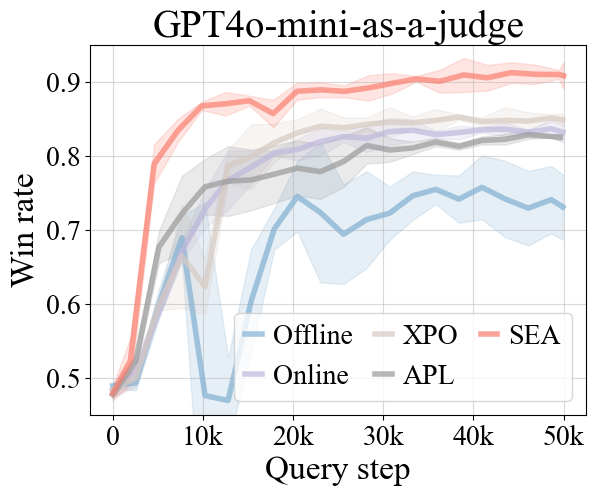

In [6]:
plt.rcParams.update({"font.family": "Times New Roman", "font.size": 20})

hue_order = [
    "offline",
    "online",
    "xpo",
    "apl",
    "sea"
]
methods_to_color = {
    "offline": "#82b0d2",
    "online": "#beb8dc",
    "sea": "#fa7f6f",
    "xpo": "#D7CAC2",
    "apl": "#999999",
}
methods_to_labels= {
    "offline": "Offline",
    "online": "Online",
    "sea": "SEA",
    "xpo": "XPO",
    "apl": "APL"
}

# g = sns.FacetGrid(df, row="dap", col="scale", hue="method", palette=methods_to_color,hue_order=hue_order,col_order=["1B", "2.8B", "6.9B"], row_order=["DPO", "IPO", 'SLiC'], sharey=True, margin_titles=True, aspect=3/2, despine=False)

# g.map(sns.lineplot, "misc/query_step", "eval/rm_win_rate_prob", alpha=.7, dashes=False,linewidth=4, errorbar=('se', 2))
# g.set_titles(col_template="Pythia {col_name}", row_template="{row_name}")

ax=sns.lineplot(data=df, x="misc/query_step", y="eval/rm_win_rate_prob", hue="method", alpha=.7, dashes=False,linewidth=4, errorbar=('se', 2), palette=methods_to_color,hue_order=hue_order)
ax.set_title("GPT4-as-a-judge", fontsize=28)
sns.move_legend(
    ax, "lower right",
    # bbox_to_anchor=(0.45, -0.07), 
    ncol=3, 
    title=None, 
    frameon=True,
    labels=[methods_to_labels[k] for k in hue_order],
    handletextpad=0.4,
    handlelength=0.6,
    columnspacing=0.8
)
ax.set_ylabel('Win rate', fontsize=24)
ax.set_xlabel('Query step', fontsize=24)
ax.set_xticks([0, 10_000, 20_000, 30_000, 40_000, 50_000],
    ["0", "10k", "20k", "30k", "40k", "50k"])
# ax.set_yticks([0.5, 0.6, 0.7, 0.8, 0.9])
ax.set_ylim(0.45, 0.95)
ax.grid(True, which="both", ls="-", c="0.7", alpha=0.5)
fig = ax.get_figure()
fig.savefig("gpt_oracle.pdf", bbox_inches="tight")